# MeJ Makers 24' Autumn School
# **AI Generative Algorithms - Learning week in Cluj**

## Machine Learning Basics : Neural Networks and Training -- *Machine Learning and the Training of Neural Nets*

### 1. Define a neural network with the following structure:
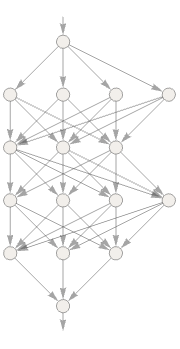

In [ ]:
import tensorflow as tf

# Define a neural network model with random weight initialization and normal distribution biases
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),  # Explicitly define the input layer
    tf.keras.layers.Dense(4, activation='relu',
                          kernel_initializer='random_uniform',  # Random initialization for weights
                          bias_initializer='random_normal'),   # Normal distribution for biases
    tf.keras.layers.Dense(3, activation='relu',
                          kernel_initializer='random_normal',   # Random initialization for weights (another option)
                          bias_initializer='random_normal'),   # Normal distribution for biases
    tf.keras.layers.Dense(4, activation='relu',
                          kernel_initializer='random_uniform',  # Random initialization for weights
                          bias_initializer='random_normal'),   # Normal distribution for biases
    tf.keras.layers.Dense(3, activation='relu',
                          kernel_initializer='random_normal',   # Random initialization for weights (another option)
                          bias_initializer='random_normal'),   # Normal distribution for biases
     tf.keras.layers.Dense(1,
                          kernel_initializer='random_uniform',  # Random initialization for weights
                          bias_initializer='random_normal')    # Normal distribution for biases
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary to see the structure
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58 (232.00 B)

 Trainable params: 58 (232.00 B)

 Non-trainable params: 0 (0.00 B)

### 2. Visualize predictions before training

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


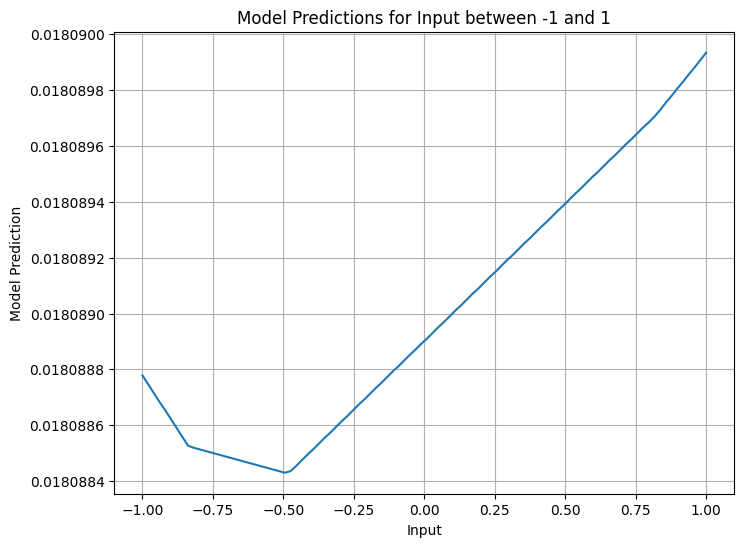

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input values between -1 and 1
input_values = np.linspace(-1, 1, 100) # Generate 100 points between -1 and 1

# Reshape input_values to be a 2D array as expected by the model
input_values = input_values.reshape(-1, 1)

# Get model predictions
predictions = model.predict(input_values)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(input_values, predictions)
plt.xlabel('Input')
plt.ylabel('Model Prediction')
plt.title('Model Predictions for Input between -1 and 1')
plt.grid(True)
plt.show()

3. ### Define the piecewise function to fit and generate a training set.

In [ ]:
def piecewise_function(x):
  """
  Defines a piecewise function.

  Args:
    x: The input argument.

  Returns:
    -1 if x < -0.3
     1 if -0.3 <= x <= 0.3
     0 if x > 0.3
  """
  if x < -0.3:
    return -1
  elif -0.3 <= x <= 0.3:
    return 1
  else:
    return 0

# Example usage:
print(f"piecewise_function(-0.5): {piecewise_function(-0.5)}")
print(f"piecewise_function(0.1): {piecewise_function(0.1)}")
print(f"piecewise_function(0.5): {piecewise_function(0.5)}")

piecewise_function(-0.5): -1
piecewise_function(0.1): 1
piecewise_function(0.5): 0


In [ ]:
# Generate input values between -1 and 1
x_train = np.linspace(-1, 1, 1000)

# Reshape input_values to be a 2D array
x_train = x_train.reshape(-1, 1)

# Generate corresponding output values using the piecewise function
y_train = np.array([piecewise_function(x) for x in x_train.flatten()])

# Reshape y_train to be a 2D array
y_train = y_train.reshape(-1, 1)

### 4. Train the model and compare the result.

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=200, batch_size=32, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


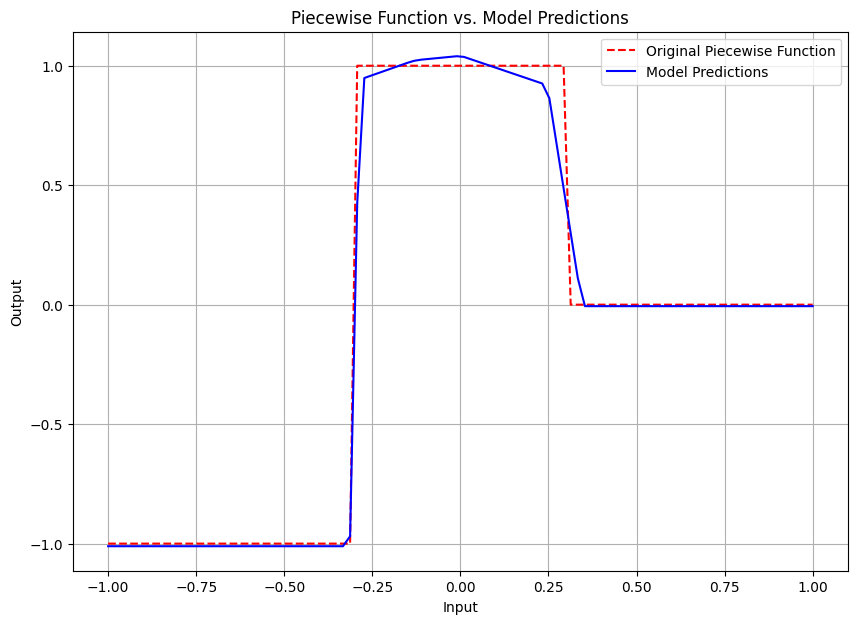

In [ ]:
# Get predictions from the trained model for the generated input values
predictions_plot = model.predict(input_values)

# Generate the corresponding output values for the original piecewise function
original_function_values = np.array([piecewise_function(x) for x in input_values.flatten()])

# Create a new figure for plotting
plt.figure(figsize=(10, 7))

# Plot the original piecewise function values
plt.plot(input_values, original_function_values, 'r--', label='Original Piecewise Function')

# Plot the model's predictions
plt.plot(input_values, predictions_plot, 'b-', label='Model Predictions')

# Add title and labels
plt.title('Piecewise Function vs. Model Predictions')
plt.xlabel('Input')
plt.ylabel('Output')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Display the plot
plt.show()

### 5. Train the model again with different parameters (epochs number, batch size) and different size of training set to get the best result you can.